In [1]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

--2021-03-09 15:43:43--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 2001:610:430:ffff::16:198, 131.224.250.75
Connecting to data.rivm.nl (data.rivm.nl)|2001:610:430:ffff::16:198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99431916 (95M) [text/csv]
Saving to: ‘COVID-19_casus_landelijk.csv’

COVID-19_casus_land 100%[===================>]  94.83M  8.09MB/s    in 12s     

2021-03-09 15:43:56 (7.84 MB/s) - ‘COVID-19_casus_landelijk.csv’ saved [99431916/99431916]



In [2]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

In [3]:
df = pd.read_csv('COVID-19_casus_landelijk.csv', sep=';', parse_dates=[0, 1], infer_datetime_format=True)
df

Date_file Date_statistics Date_statistics_type Agegroup  \
0       2021-03-09 10:00:00      2020-01-01                  DOO    40-49   
1       2021-03-09 10:00:00      2020-01-01                  DOO    50-59   
2       2021-03-09 10:00:00      2020-01-01                  DOO    20-29   
3       2021-03-09 10:00:00      2020-01-01                  DOO    60-69   
4       2021-03-09 10:00:00      2020-01-04                  DOO    10-19   
...                     ...             ...                  ...      ...   
1128197 2021-03-09 10:00:00      2021-03-09                  DPL    40-49   
1128198 2021-03-09 10:00:00      2021-03-09                  DPL    10-19   
1128199 2021-03-09 10:00:00      2021-03-09                  DON      90+   
1128200 2021-03-09 10:00:00      2021-03-09                  DPL    70-79   
1128201 2021-03-09 10:00:00      2021-03-09                  DON    80-89   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
0        Female  Noord-Holland                 No       No            NaN   
1          Male     Gelderland                 No       No            NaN   
2        Female   Zuid-Holland                 No       No            NaN   
3        Female  Noord-Holland                 No       No            NaN   
4        Female     Gelderland            Unknown       No            NaN   
...         ...            ...                ...      ...            ...   
1128197    Male   Zuid-Holland            Unknown  Unknown            NaN   
1128198    Male     Overijssel            Unknown  Unknown            NaN   
1128199  Female     Overijssel            Unknown       No            NaN   
1128200  Female   Zuid-Holland            Unknown  Unknown            NaN   
1128201  Female     Overijssel            Unknown       No            NaN   

                                  Municipal_health_service  
0                                            GGD Amsterdam  
1        Veiligheids- en Gezondheidsregio Gelderland-Mi...  
2                                      GGD Hollands-Midden  
3                                     GGD Hollands-Noorden  
4                                      GGD Gelderland-Zuid  
...                                                    ...  
1128197                                     GGD Haaglanden  
1128198                                     GGD IJsselland  
1128199                                   GGD Regio Twente  
1128200                                GGD Hollands-Midden  
1128201                                   GGD Regio Twente  

[1128202 rows x 10 columns]

In [4]:
df.count()

Date_file                   1128202
Date_statistics             1128202
Date_statistics_type        1128202
Agegroup                    1128202
Sex                         1128202
Province                    1128202
Hospital_admission          1128202
Deceased                    1128202
Week_of_death                 15916
Municipal_health_service    1128202
dtype: int64

In [5]:
daterep = 'Date_statistics'
region  = 'Agegroup'
cases   = 'cases'
deaths  = 'Deceased'

lastdate = df[daterep].max() - pd.Timedelta('7 days')

df[cases]  = 1
df[deaths] = df[deaths].apply(lambda x: 1 if x == 'Yes' else 0)
df

Date_file Date_statistics Date_statistics_type Agegroup  \
0       2021-03-09 10:00:00      2020-01-01                  DOO    40-49   
1       2021-03-09 10:00:00      2020-01-01                  DOO    50-59   
2       2021-03-09 10:00:00      2020-01-01                  DOO    20-29   
3       2021-03-09 10:00:00      2020-01-01                  DOO    60-69   
4       2021-03-09 10:00:00      2020-01-04                  DOO    10-19   
...                     ...             ...                  ...      ...   
1128197 2021-03-09 10:00:00      2021-03-09                  DPL    40-49   
1128198 2021-03-09 10:00:00      2021-03-09                  DPL    10-19   
1128199 2021-03-09 10:00:00      2021-03-09                  DON      90+   
1128200 2021-03-09 10:00:00      2021-03-09                  DPL    70-79   
1128201 2021-03-09 10:00:00      2021-03-09                  DON    80-89   

            Sex       Province Hospital_admission  Deceased  Week_of_death  \
0        Female  Noord-Holland                 No         0            NaN   
1          Male     Gelderland                 No         0            NaN   
2        Female   Zuid-Holland                 No         0            NaN   
3        Female  Noord-Holland                 No         0            NaN   
4        Female     Gelderland            Unknown         0            NaN   
...         ...            ...                ...       ...            ...   
1128197    Male   Zuid-Holland            Unknown         0            NaN   
1128198    Male     Overijssel            Unknown         0            NaN   
1128199  Female     Overijssel            Unknown         0            NaN   
1128200  Female   Zuid-Holland            Unknown         0            NaN   
1128201  Female     Overijssel            Unknown         0            NaN   

                                  Municipal_health_service  cases  
0                                            GGD Amsterdam      1  
1        Veiligheids- en Gezondheidsregio Gelderland-Mi...      1  
2                                      GGD Hollands-Midden      1  
3                                     GGD Hollands-Noorden      1  
4                                      GGD Gelderland-Zuid      1  
...                                                    ...    ...  
1128197                                     GGD Haaglanden      1  
1128198                                     GGD IJsselland      1  
1128199                                   GGD Regio Twente      1  
1128200                                GGD Hollands-Midden      1  
1128201                                   GGD Regio Twente      1  

[1128202 rows x 11 columns]

In [6]:
df_geo = df.pivot_table(index=daterep, columns=region, values=[cases, deaths], aggfunc='sum').fillna(0)
df_geo['cases']

Agegroup           0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  \
Date_statistics                                                           
2020-01-01         0.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0   
2020-01-04         0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2020-01-06         0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
2020-01-16         1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2020-01-20         1.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
...                ...    ...    ...    ...    ...    ...    ...    ...   
2021-03-05       237.0  467.0  546.0  501.0  494.0  523.0  289.0  143.0   
2021-03-06       247.0  338.0  407.0  364.0  339.0  380.0  210.0  103.0   
2021-03-07       239.0  261.0  320.0  280.0  245.0  304.0  144.0   89.0   
2021-03-08       191.0  308.0  350.0  293.0  324.0  318.0  184.0  110.0   
2021-03-09        41.0   51.0   83.0   43.0   58.0   53.0   29.0   21.0   

Agegroup         80-89   90+  <50  Unknown  
Date_statistics                             
2020-01-01         0.0   0.0  0.0      0.0  
2020-01-04         0.0   0.0  0.0      0.0  
2020-01-06         0.0   0.0  0.0      0.0  
2020-01-16         0.0   0.0  0.0      0.0  
2020-01-20         0.0   0.0  0.0      0.0  
...                ...   ...  ...      ...  
2021-03-05        80.0  25.0  0.0      0.0  
2021-03-06        52.0  14.0  0.0      0.0  
2021-03-07        38.0   3.0  0.0      0.0  
2021-03-08        27.0   7.0  0.0      0.0  
2021-03-09        12.0   2.0  0.0      0.0  

[410 rows x 12 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

Deceased                                                       ...  \
Agegroup        0-9 10-19 20-29 30-39 40-49 50-59 60-69 70-79 80-89  90+  ...   
2020-01-01      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
2020-01-02      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2020-01-03      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2020-01-04      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
2020-01-05      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
2022-03-05      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-03-06      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-03-07      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-03-08      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-03-09      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   

           cases                                                        
Agegroup   20-29 30-39 40-49 50-59 60-69 70-79 80-89  90+  <50 Unknown  
2020-01-01   1.0   0.0   1.0   1.0   1.0   0.0   0.0  0.0  0.0     0.0  
2020-01-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2020-01-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2020-01-04   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0     0.0  
2020-01-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
...          ...   ...   ...   ...   ...   ...   ...  ...  ...     ...  
2022-03-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-03-06   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-03-07   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-03-08   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-03-09   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  

[799 rows x 24 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [8]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    799.000000
mean     399.000000
std      230.795725
min        0.000000
25%      199.500000
50%      399.000000
75%      598.500000
max      798.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [9]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [10]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running multiple wave analysis for '0-9'
Minimum number of cases is 2
Wave 01 beta 18.098 mu 202 fit 0.965 peak 2020-07-21 from 2020-06-23 to 2020-09-20 size 523
Wave 02 beta  8.116 mu  82 fit 0.770 peak 2020-03-23 from 2020-03-14 to 2020-04-10 size 76
Wave 03 beta  5.161 mu 255 fit 0.862 peak 2020-09-12 from 2020-09-04 to 2020-10-02 size 226
Wave 04 beta  5.017 mu 265 fit 0.810 peak 2020-09-22 from 2020-09-15 to 2020-10-07 size 97
Wave 05 beta  5.441 mu 275 fit 0.828 peak 2020-10-02 from 2020-09-24 to 2020-10-23 size 237
Wave 06 beta  8.387 mu 156 fit 0.895 peak 2020-06-05 from 2020-05-24 to 2020-06-30 size 164
Wave 07 beta  5.386 mu 291 fit 0.915 peak 2020-10-18 from 2020-10-08 to 2020-11-15 size 797
Wave 08 beta  6.593 mu 304 fit 0.893 peak 2020-10-31 from 2020-10-19 to 2020-12-02 size 782
Wave 09 beta  8.042 mu 321 fit 0.907 peak 2020-11-17 from 2020-11-02 to 2020-12-26 size 1049
Wave 10 beta  7.374 mu 334 fit 0.863 peak 2020-11-30 from 2020-11-16 to 2021-01-03 size 790
Wave 11 bet

Wave 13 beta  7.776 mu 395 fit 0.859 peak 2021-01-30 from 2021-01-13 to 2021-03-26 size 9341
Wave 14 beta 15.541 mu 424 fit 0.931 peak 2021-02-28 from 2021-01-24 to 2021-06-23 size 24534
--- no data for wave
Running multiple wave analysis for '50-59'
Minimum number of cases is 2
Wave 01 beta 19.805 mu  91 fit 0.671 peak 2020-04-01 from 2020-02-20 to 2020-08-01 size 9236
Wave 02 beta  2.440 mu  81 fit 0.465 peak 2020-03-22 from 2020-03-18 to 2020-04-01 size 103
Wave 03 beta  4.589 mu  97 fit 0.609 peak 2020-04-07 from 2020-03-30 to 2020-04-29 size 454
Wave 04 beta  9.957 mu 222 fit 0.706 peak 2020-08-10 from 2020-07-21 to 2020-10-05 size 2531
Wave 05 beta 15.670 mu 266 fit 0.864 peak 2020-09-23 from 2020-08-20 to 2021-01-07 size 13044
Wave 06 beta 19.367 mu 297 fit 0.825 peak 2020-10-24 from 2020-09-09 to 2021-04-02 size 73849
Wave 07 beta  4.979 mu 293 fit 0.471 peak 2020-10-20 from 2020-10-10 to 2020-11-20 size 2337
Wave 08 beta 12.543 mu 354 fit 0.878 peak 2020-12-20 from 2020-11-20 

Wave 05 beta  6.156 mu 287 fit 0.916 peak 2020-10-15 from 2020-10-03 to 2020-11-13 size 747
Wave 06 beta  7.462 mu 300 fit 0.914 peak 2020-10-27 from 2020-10-13 to 2020-12-08 size 1803
Wave 07 beta  6.020 mu 311 fit 0.840 peak 2020-11-07 from 2020-10-28 to 2020-12-04 size 475
Wave 08 beta  7.856 mu 324 fit 0.944 peak 2020-11-20 from 2020-11-06 to 2020-12-30 size 1124
Wave 09 beta  8.856 mu 343 fit 0.862 peak 2020-12-09 from 2020-11-22 to 2021-01-24 size 1473
Wave 10 beta  6.149 mu 350 fit 0.829 peak 2020-12-16 from 2020-12-04 to 2021-01-17 size 1032
Wave 11 beta  7.764 mu 360 fit 0.939 peak 2020-12-26 from 2020-12-11 to 2021-02-07 size 1965
Wave 12 beta  5.061 mu 371 fit 0.897 peak 2021-01-06 from 2020-12-28 to 2021-01-31 size 695
Wave 13 beta  5.495 mu 380 fit 0.936 peak 2021-01-15 from 2021-01-05 to 2021-02-13 size 982
Wave 14 beta  7.926 mu 395 fit 0.927 peak 2021-01-30 from 2021-01-15 to 2021-03-11 size 1204
Wave 15 beta  4.556 mu 406 fit 0.903 peak 2021-02-10 from 2021-02-02 to 20

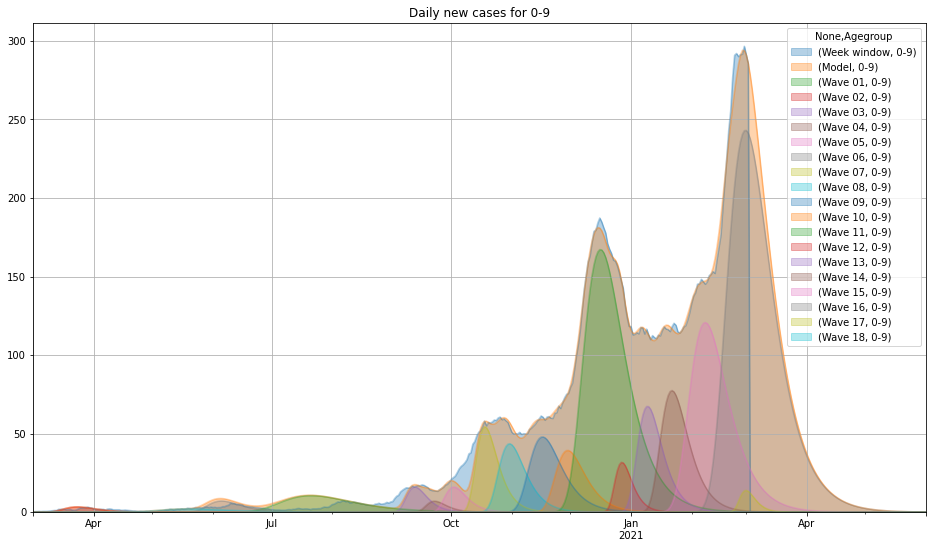

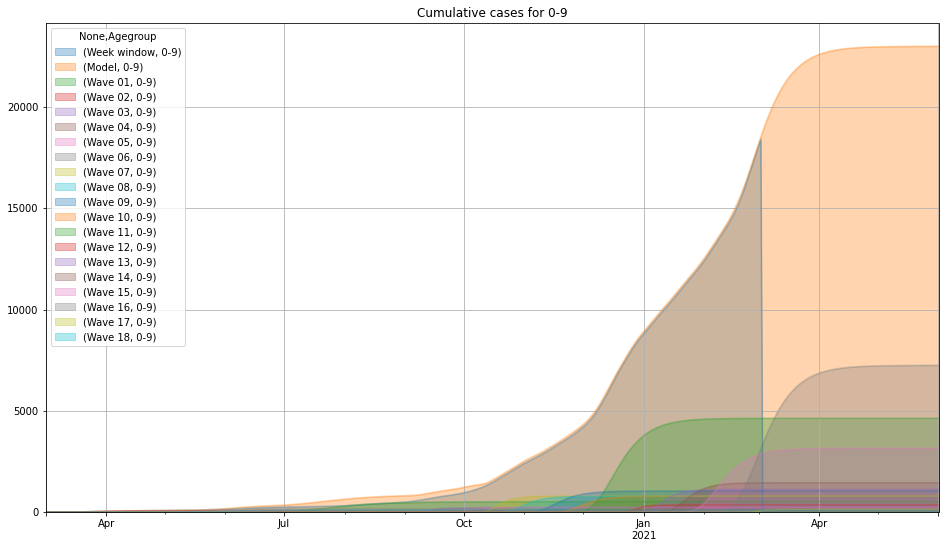

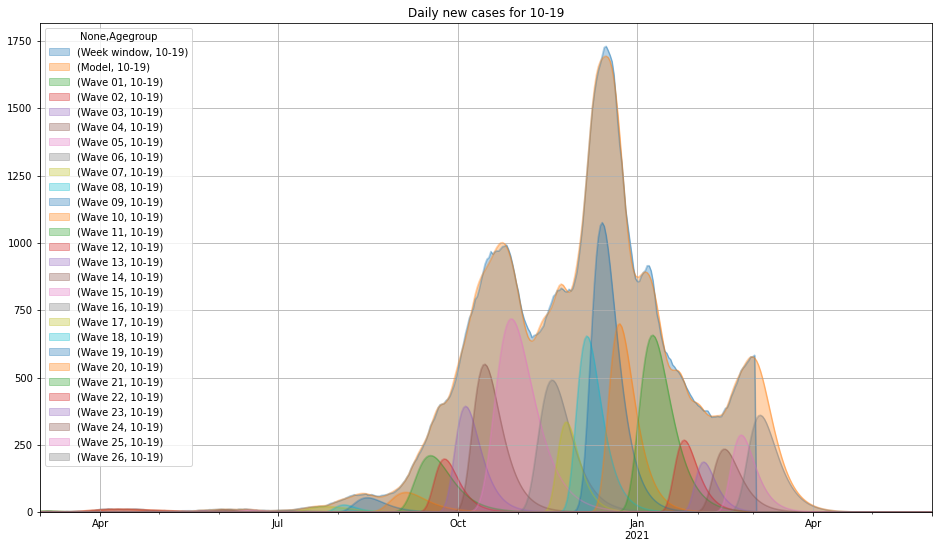

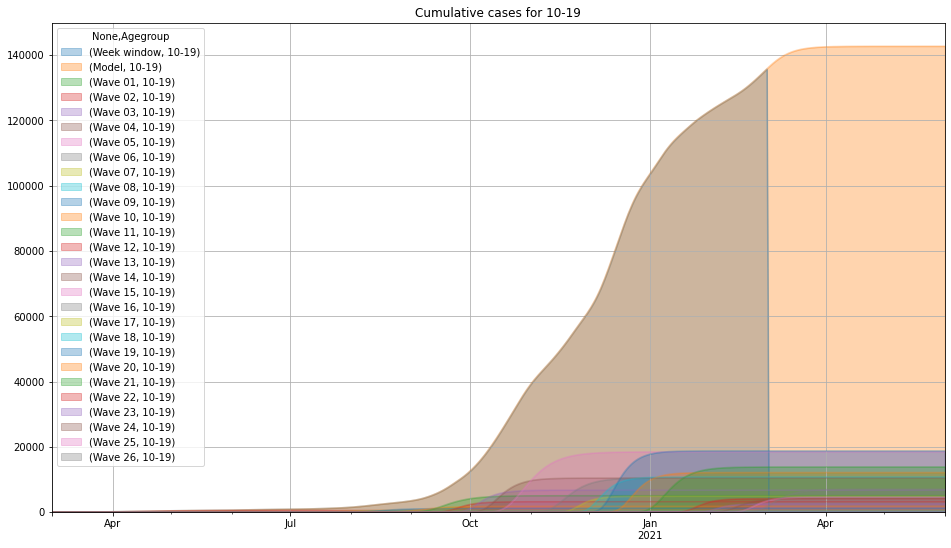

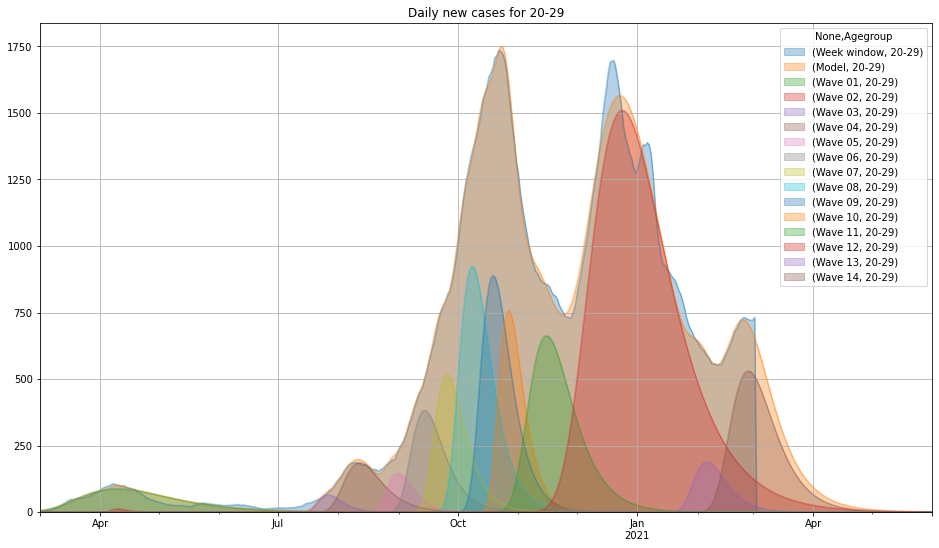

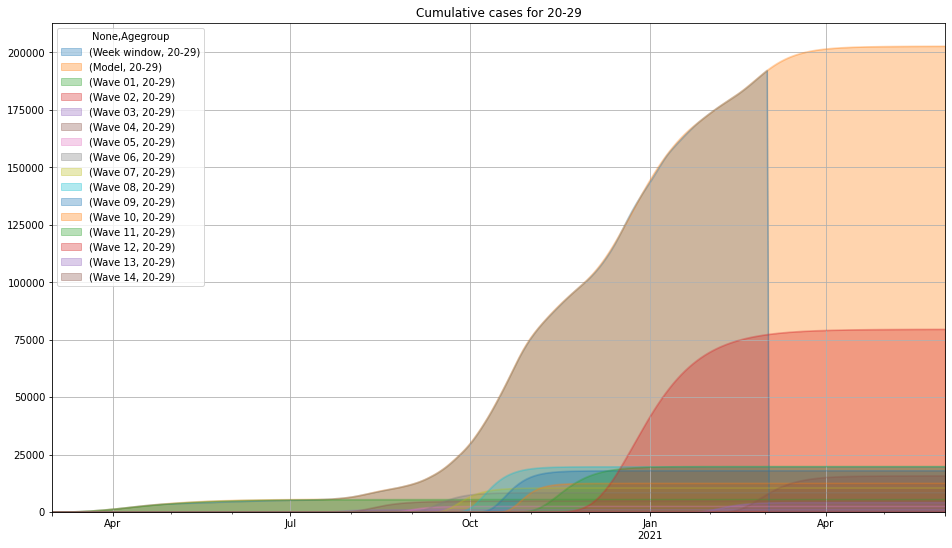

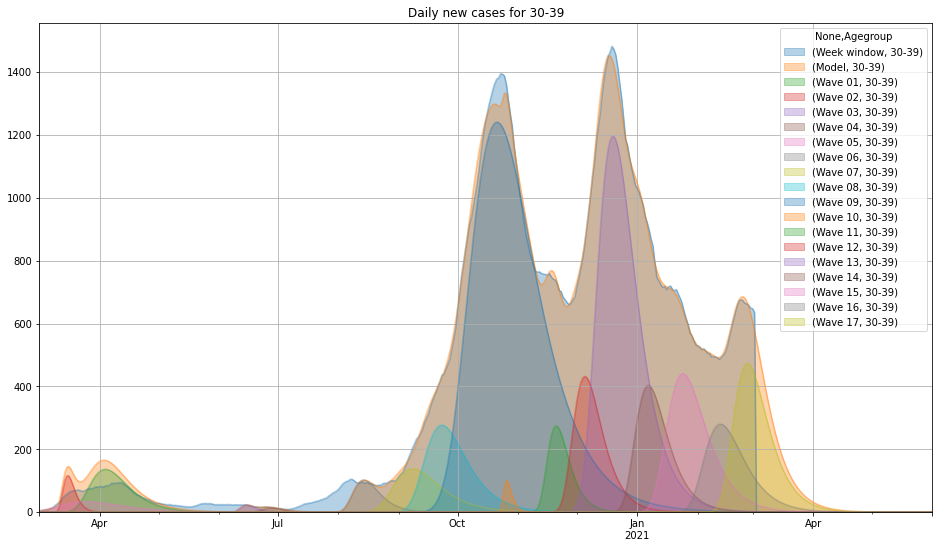

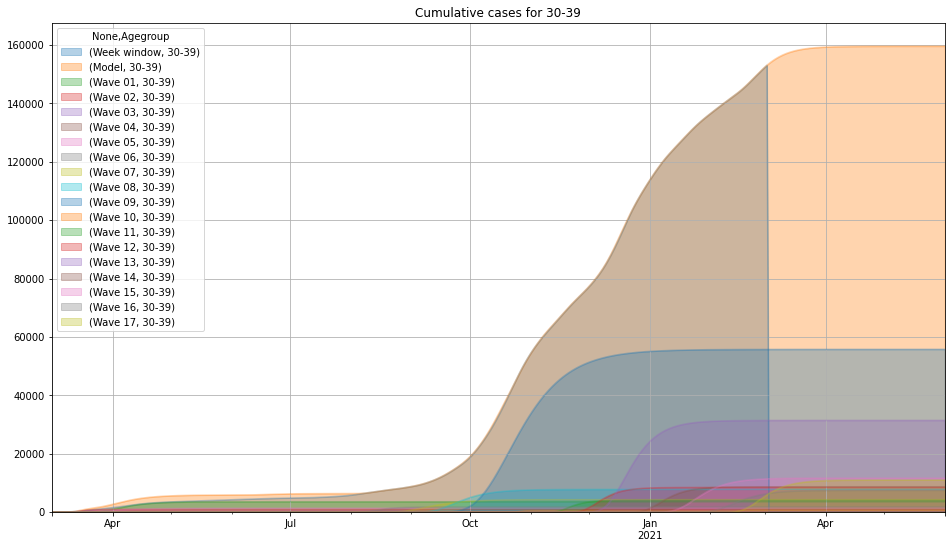

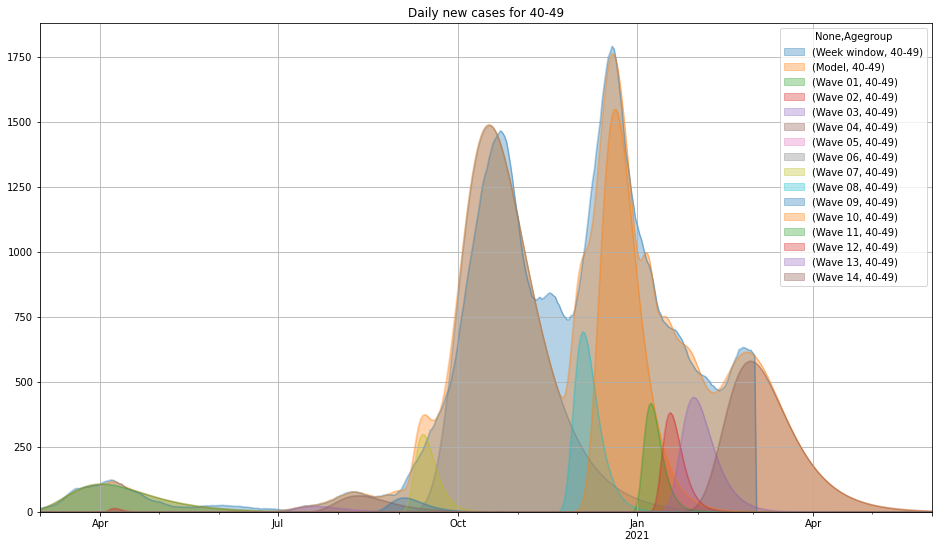

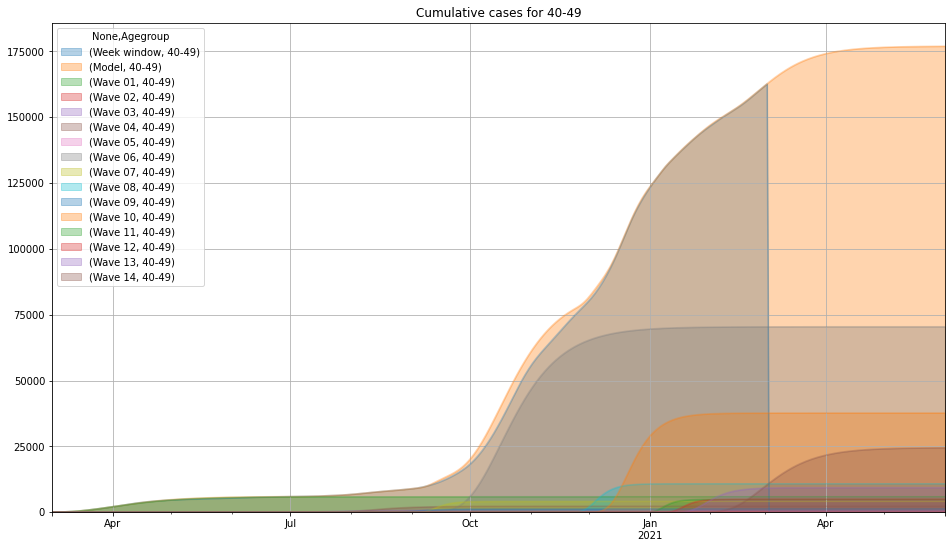

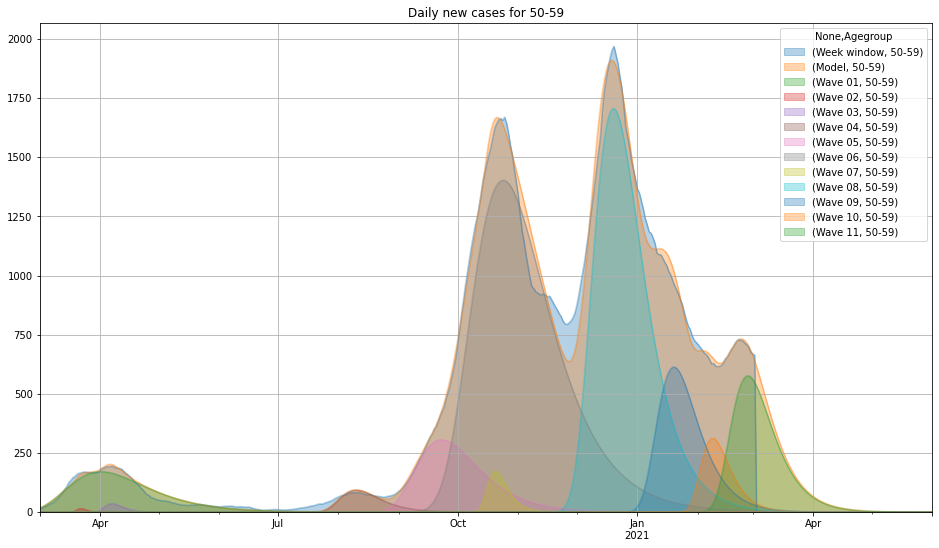

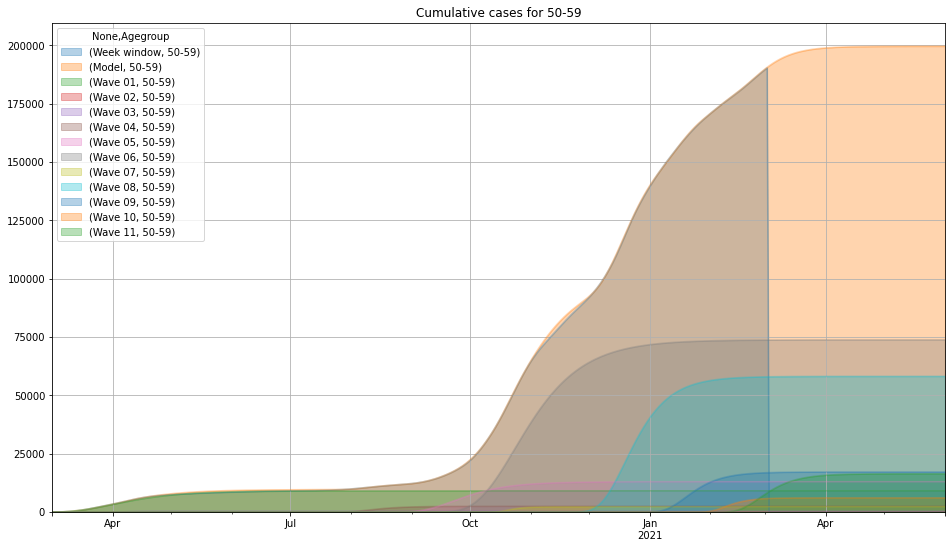

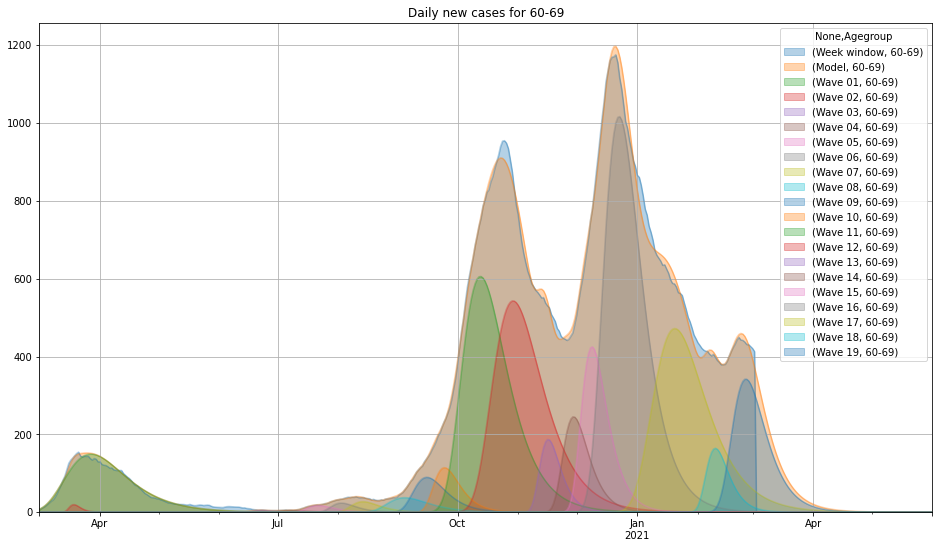

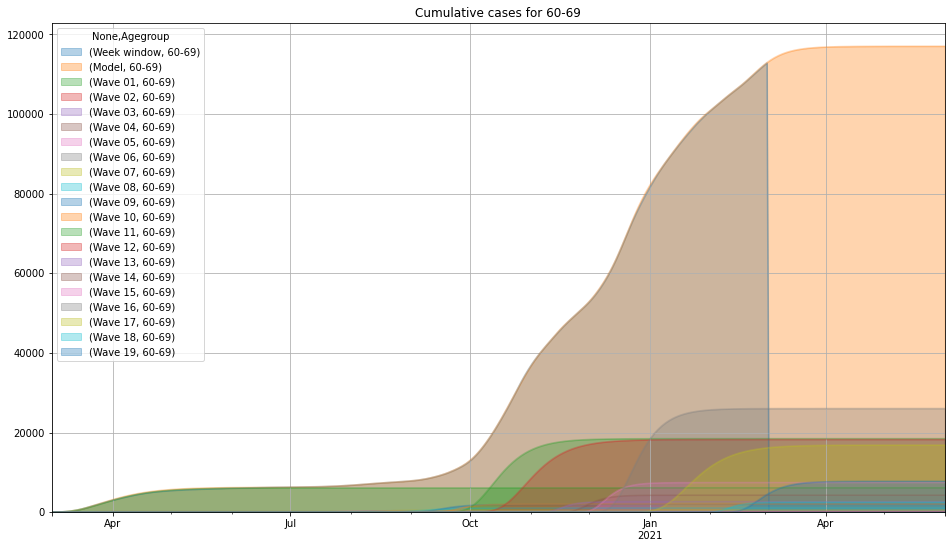

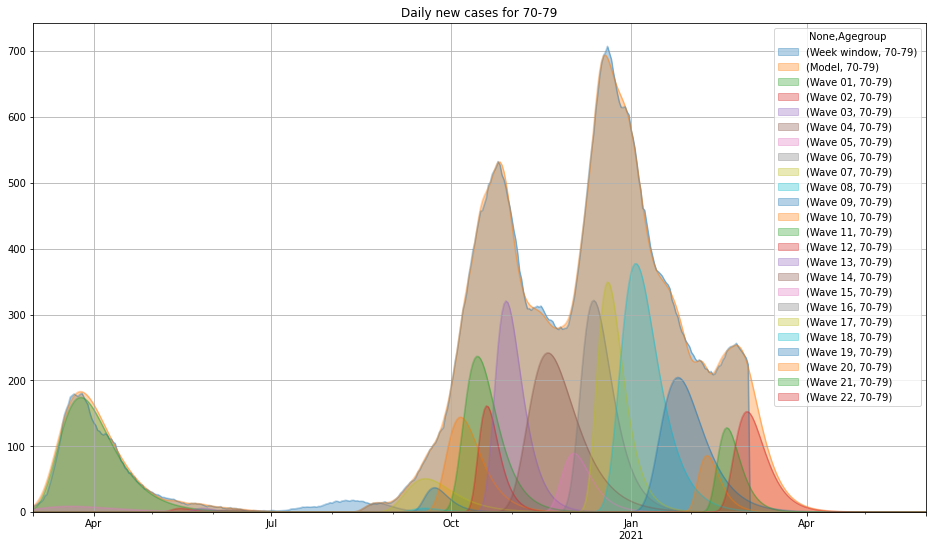

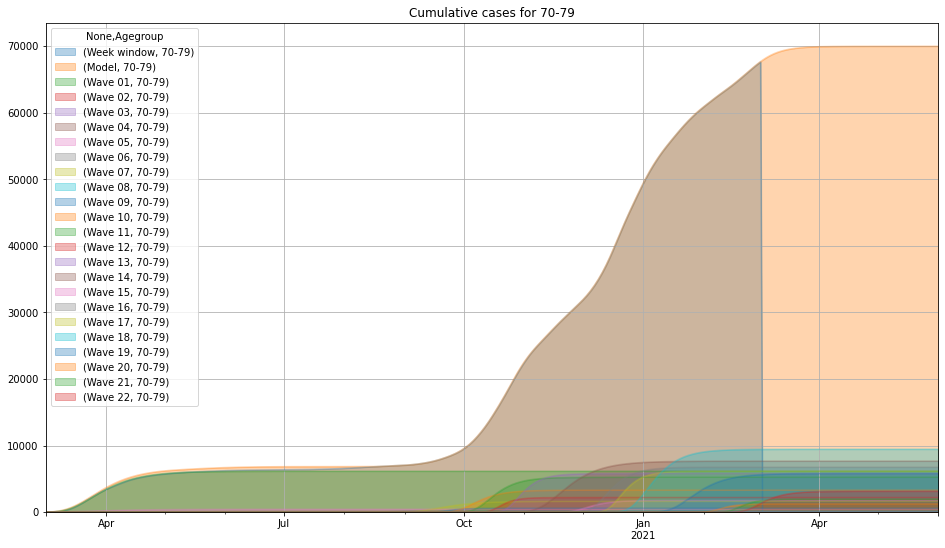

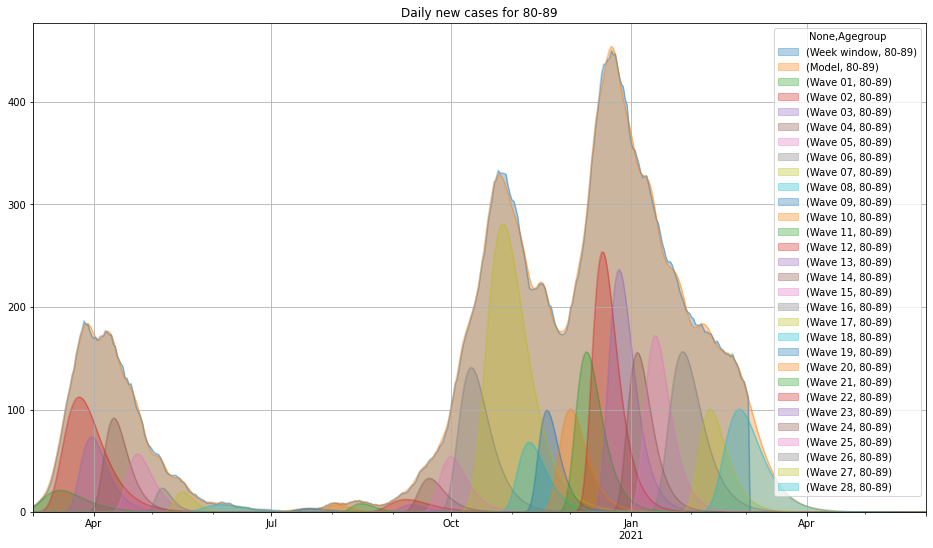

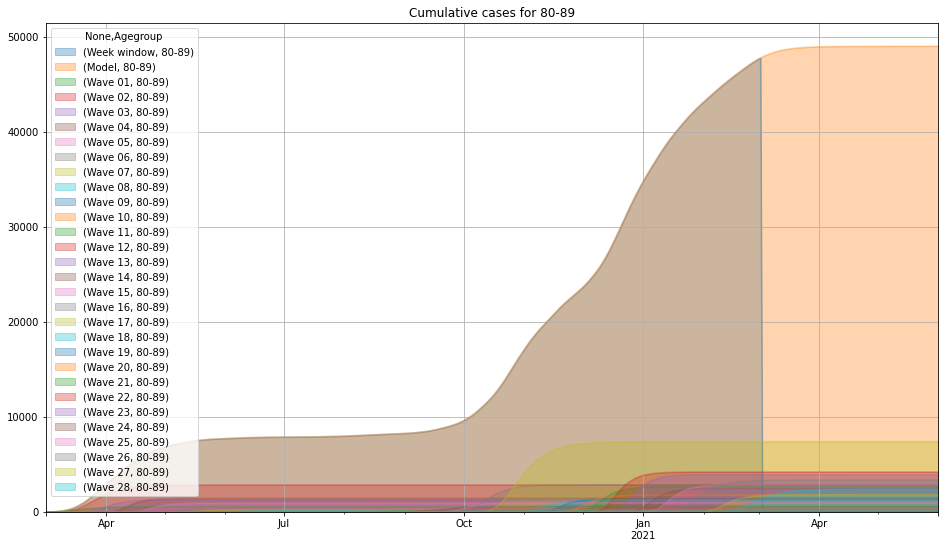

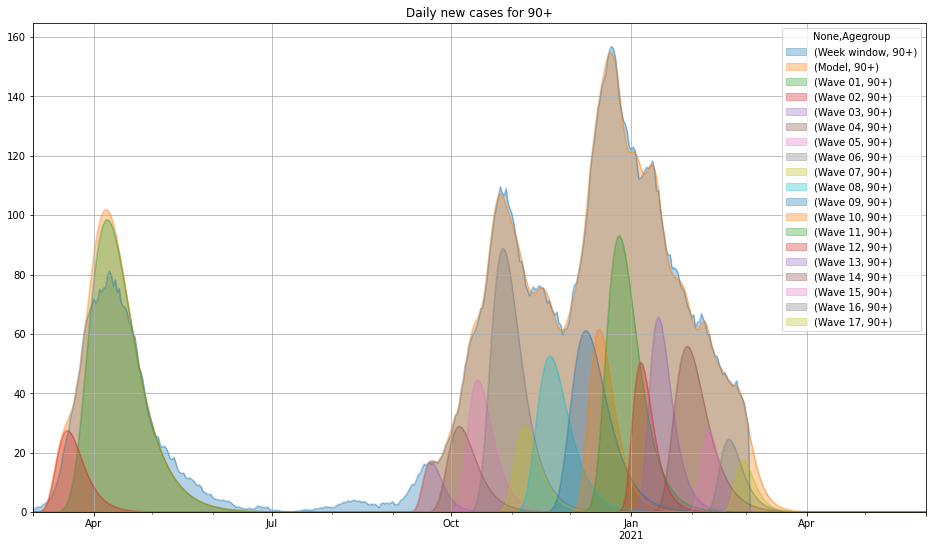

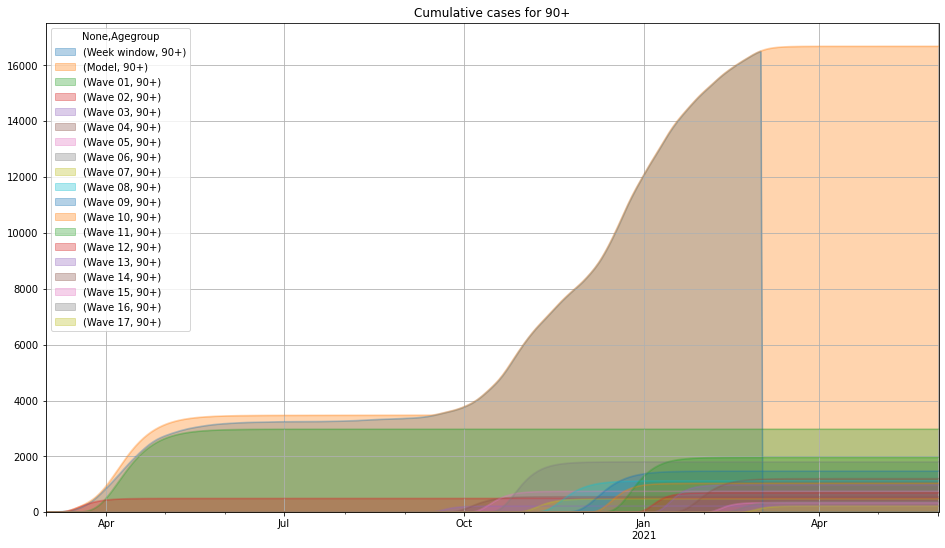

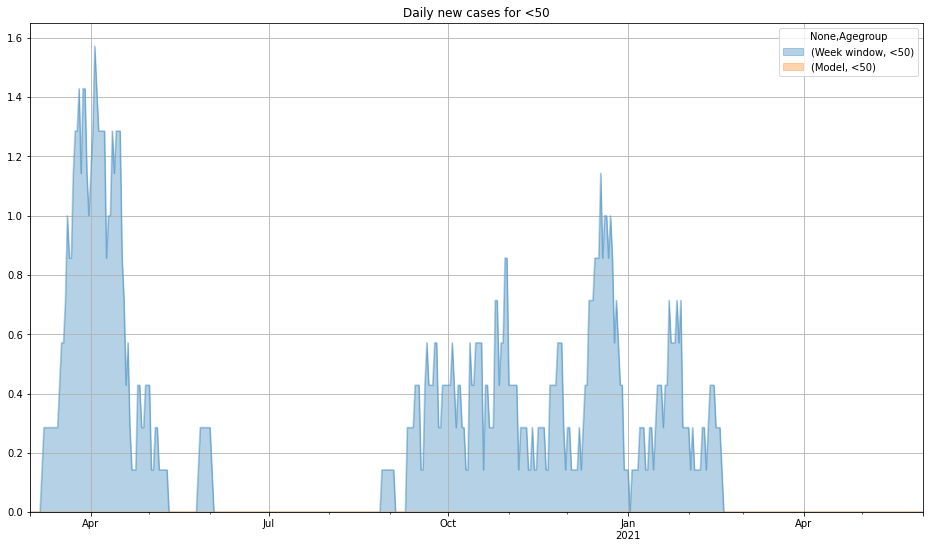

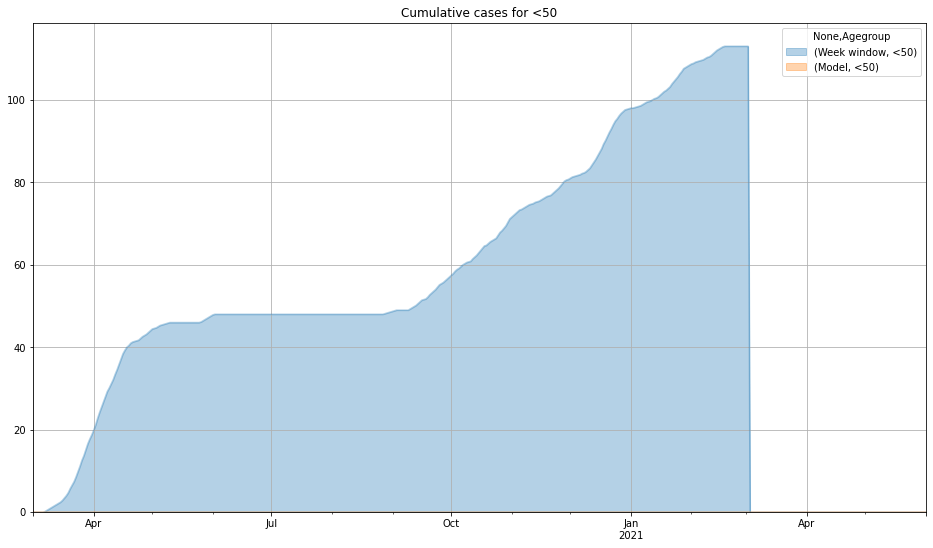

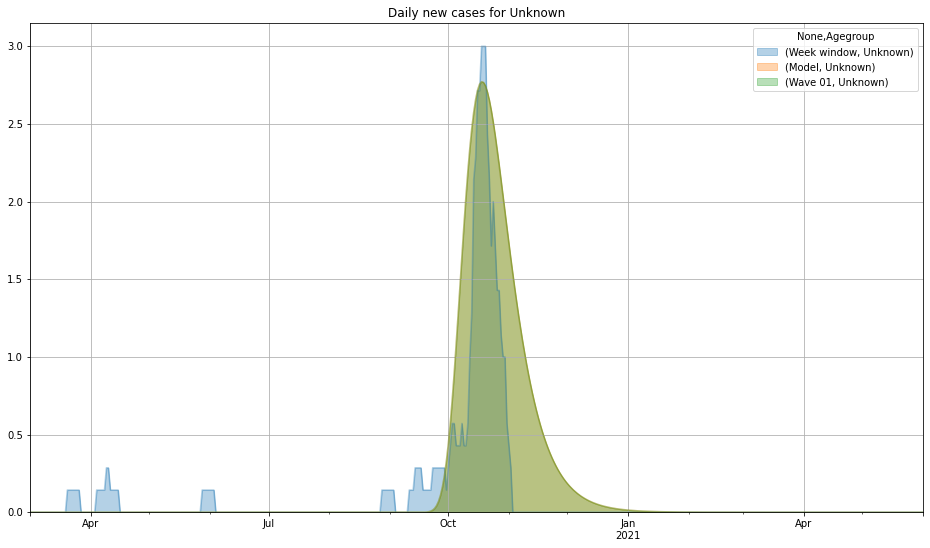

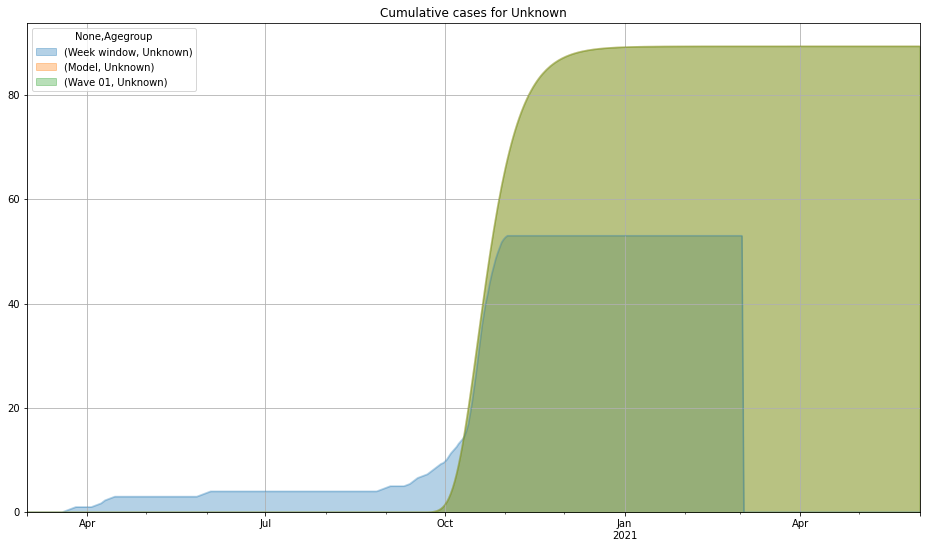

In [11]:
# Select regions to fit.
regions = np.sort(df[region].unique())

# Choose whether to output plots per region.
showplots = True

measure  = cases
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted
wmeasure = 'Wave '       # waves

for region in regions:

    wave = 1

    df_geo[(pmeasure, region)] = 0
    df_geo[(smeasure, region)] = df_geo[measure][region].loc[:lastdate].rolling(7).mean()
    df_geo[(rmeasure, region)] = df_geo[smeasure][region]

    plotlist = [(smeasure, region), (pmeasure, region)]

    #countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    #popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

    #mincases = popdata / 1e6
    mincases = 2
    #mincases = df_geo[smeasure][country].sum() / 5000
    #mincases = max(popdata / 1e6, 10)

    print('Running multiple wave analysis for \'{}\''.format(region))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, region)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][region]})
        
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])

        df_pred = df_pred[(df_pred['linear'] < -9/20) &
                          (df_pred['linear'] > -9/2)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break

        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        #eamodel = Earth()
        #eamodel = Earth(minspan=0)
        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)

        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        fitmod = export.export_python_function(eamodel)

        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -3/90) &
                           (df_knot['daysdata'] >= 3))
        
        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        #df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final

        df_geo[(curwave, region)] = final * gumpdf(df_geo['daynum'], beta, mu)        

        peak = df_geo[df_geo[(curwave, region)] == df_geo[(curwave, region)].max()].index.min()
        start = df_geo[(df_geo[(curwave, region)] >= 1) &
                       (df_geo[(curwave, region)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, region)] < 1) &
                       (df_geo[(curwave, region)].index > peak)].index.min()

        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))
       
        df_geo[(pmeasure, region)] += df_geo[(curwave, region)]
        df_geo[(rmeasure, region)] -= df_geo[(curwave, region)]
        plotlist += [(curwave, region)]
        wave += 1
        
    if showplots:
        df_geo[plotlist].loc['20200301':'20210601'].plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Daily new cases for '+region)

        df_geo[plotlist].loc['20200301':'20210601'].cumsum().plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Cumulative cases for '+region)

In [12]:
df_out = df_geo[pmeasure].melt(ignore_index=False).reset_index()
df_out.columns = (['date', 'location', 'value'])
df_out.to_csv('zzcorggd.csv')

Keep exploring! Stay home, wash your hands, keep your distance.